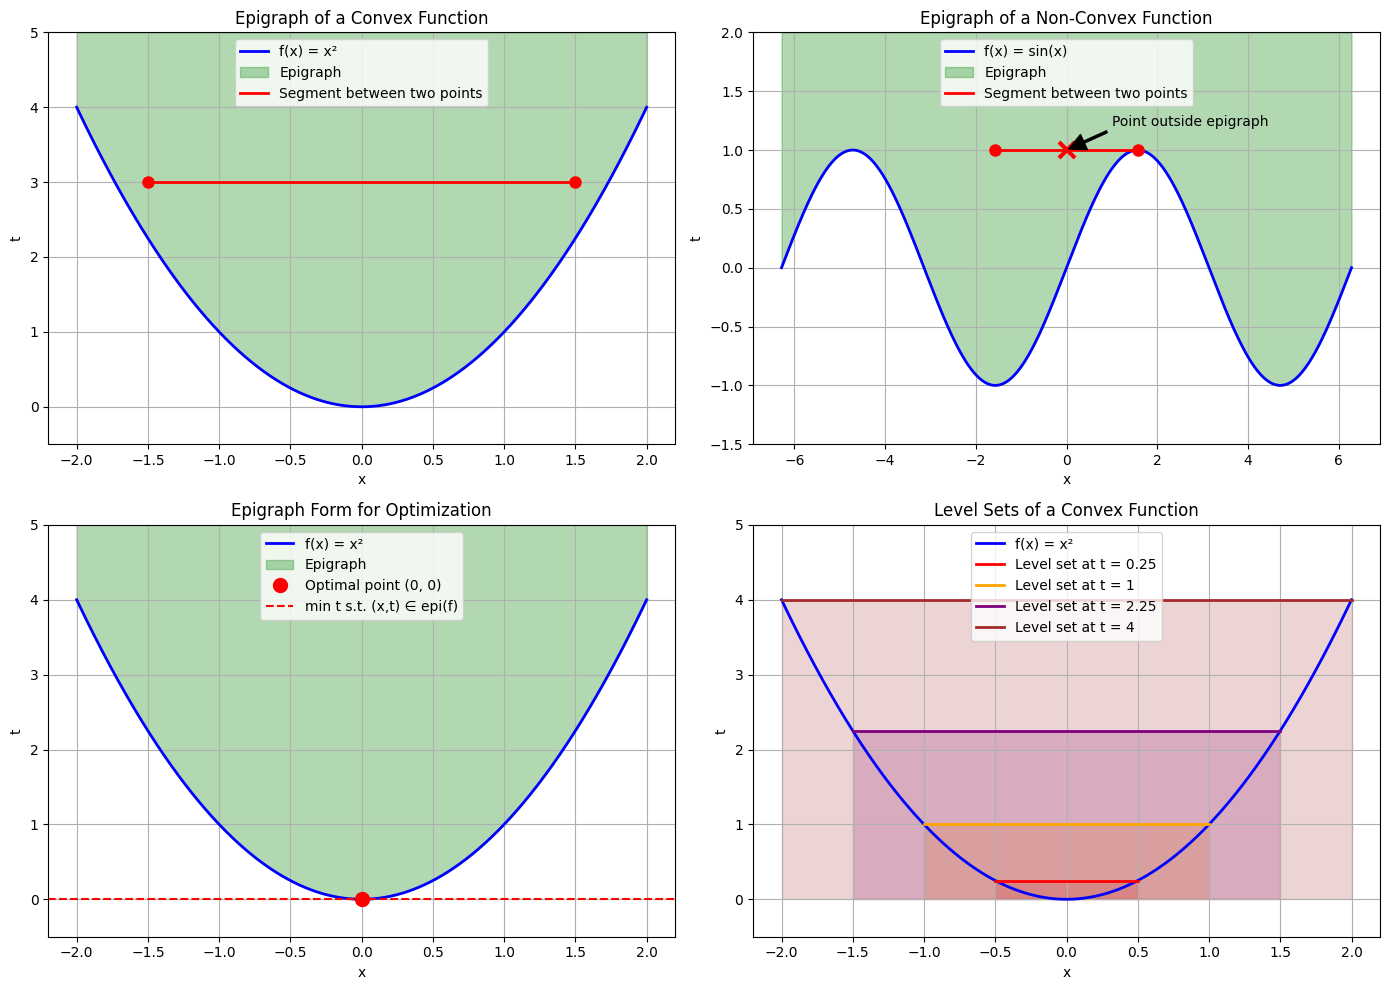

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)


# Define a convex function: f(x) = x²
def convex_function(x):
    return x**2


# Define a non-convex function: f(x) = sin(x)
def non_convex_function(x):
    return np.sin(x)


# Plot 1: Convex function and its epigraph
x = np.linspace(-2, 2, 1000)
y_convex = convex_function(x)

axs[0, 0].plot(x, y_convex, "b-", linewidth=2, label="f(x) = x²")
axs[0, 0].fill_between(x, y_convex, 5, alpha=0.3, color="green", label="Epigraph")

# Add two points in the epigraph and a line connecting them
x1, t1 = -1.5, 3
x2, t2 = 1.5, 3
axs[0, 0].plot(
    [x1, x2], [t1, t2], "r-", linewidth=2, label="Segment between two points"
)
axs[0, 0].plot(x1, t1, "ro", markersize=8)
axs[0, 0].plot(x2, t2, "ro", markersize=8)

axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("t")
axs[0, 0].set_title("Epigraph of a Convex Function")
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_ylim(-0.5, 5)

# Plot 2: Non-convex function and its epigraph
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_non_convex = non_convex_function(x)

axs[0, 1].plot(x, y_non_convex, "b-", linewidth=2, label="f(x) = sin(x)")
axs[0, 1].fill_between(x, y_non_convex, 2, alpha=0.3, color="green", label="Epigraph")

# Add two points in the epigraph and a line connecting them
x1, t1 = -np.pi / 2, 1
x2, t2 = np.pi / 2, 1
axs[0, 1].plot(
    [x1, x2], [t1, t2], "r-", linewidth=2, label="Segment between two points"
)
axs[0, 1].plot(x1, t1, "ro", markersize=8)
axs[0, 1].plot(x2, t2, "ro", markersize=8)

# Highlight a point on the segment that falls outside the epigraph
mid_x = 0
mid_t = 1
axs[0, 1].plot(mid_x, mid_t, "rx", markersize=12, mew=3)
axs[0, 1].annotate(
    "Point outside epigraph",
    xy=(mid_x, mid_t),
    xytext=(mid_x + 1, mid_t + 0.2),
    arrowprops=dict(facecolor="black", shrink=0.05, width=1.5),
)

axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("t")
axs[0, 1].set_title("Epigraph of a Non-Convex Function")
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_ylim(-1.5, 2)

# Plot 3: Epigraph form for optimization
x = np.linspace(-2, 2, 1000)
y_convex = convex_function(x)

axs[1, 0].plot(x, y_convex, "b-", linewidth=2, label="f(x) = x²")
axs[1, 0].fill_between(x, y_convex, 5, alpha=0.3, color="green", label="Epigraph")

# Add the optimal point and level line
opt_x = 0
opt_y = convex_function(opt_x)
axs[1, 0].plot(opt_x, opt_y, "ro", markersize=10, label="Optimal point (0, 0)")
axs[1, 0].axhline(y=opt_y, color="r", linestyle="--", label="min t s.t. (x,t) ∈ epi(f)")

axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("t")
axs[1, 0].set_title("Epigraph Form for Optimization")
axs[1, 0].legend(loc="upper center")
axs[1, 0].grid(True)
axs[1, 0].set_ylim(-0.5, 5)

# Plot 4: Level sets (sublevel sets) relationship
x = np.linspace(-2, 2, 1000)
y_convex = convex_function(x)

axs[1, 1].plot(x, y_convex, "b-", linewidth=2, label="f(x) = x²")

# Add several level sets
levels = [0.25, 1, 2.25, 4]
colors = ["red", "orange", "purple", "brown"]
for i, level in enumerate(levels):
    # Find x values where f(x) <= level
    x_level = x[y_convex <= level]
    if len(x_level) > 0:
        axs[1, 1].plot(
            [min(x_level), max(x_level)],
            [level, level],
            color=colors[i],
            linewidth=2,
            label=f"Level set at t = {level}",
        )
        axs[1, 1].fill_between(
            [min(x_level), max(x_level)],
            [0, 0],
            [level, level],
            alpha=0.2,
            color=colors[i],
        )

axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("t")
axs[1, 1].set_title("Level Sets of a Convex Function")
axs[1, 1].legend(loc="upper center")
axs[1, 1].grid(True)
axs[1, 1].set_ylim(-0.5, 5)

plt.tight_layout()
plt.show()